# Initialize

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [ ]:
import numpy as np
import pandas as pd
import io
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(2)
data = pd.read_csv('winequality-red.csv', delimiter=';')
y = data.quality.values  # get the target
X = data.drop('quality', axis=1).values  # get the input
data.corr().round(2)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.isnull().sum()  # check NaN data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Input Distribution

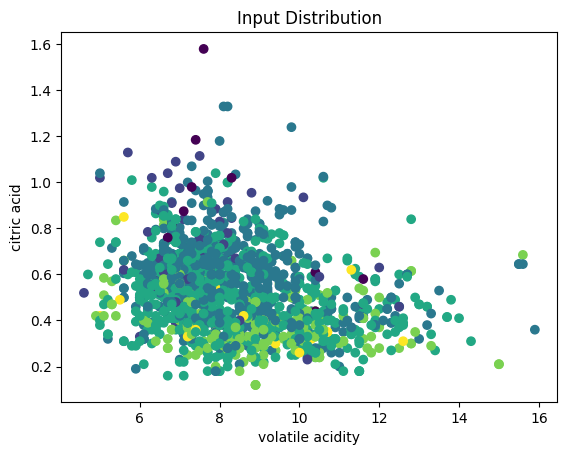

In [ ]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(data.columns[1])
plt.ylabel(data.columns[2])
plt.title('Input Distribution')
plt.savefig('input.jpg')

# Quality Distribution

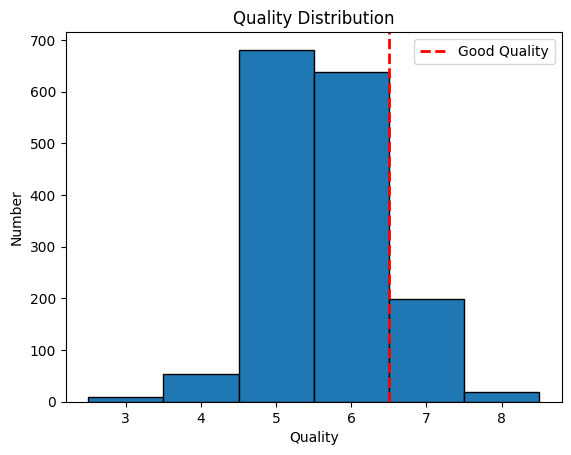

In [ ]:
plt.figure()
plt.hist(y, bins=[2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], edgecolor='black')
plt.axvline(6.5, color='red', ls='--',lw=2, label='Good Quality')
plt.title('Quality Distribution')
plt.ylabel('Number')
plt.xlabel('Quality')
plt.legend()
plt.savefig('quality dist.jpg')

# Model Shortcut



In [ ]:
def model(X, y, prediction=False):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
  rf = RandomForestClassifier()  # Randon Forest
  ann = MLPClassifier(activation='logistic', hidden_layer_sizes=20,
                      max_iter=1000)  # ANN
  knn = KNeighborsClassifier(n_neighbors=20)  # KNN
  svm = SVC(kernel='rbf')  # Support Vector Machine
  # predict
  y_rf = rf.fit(X_train, y_train).predict(X_test)
  y_ann = ann.fit(X_train, y_train).predict(X_test)
  y_knn = knn.fit(X_train, y_train).predict(X_test)
  y_svm = svm.fit(X_train, y_train).predict(X_test)
  # accuracy
  accuracy_rf = accuracy_score(y_rf, y_test)  # RF accuracy
  accuracy_ann = accuracy_score(y_ann, y_test)  # ANN accuracy
  accuracy_knn = accuracy_score(y_knn, y_test)  # KNN accuracy
  accuracy_svm = accuracy_score(y_svm, y_test)  # SVM accuracy
  Accuracy = [accuracy_rf, accuracy_ann, accuracy_knn, accuracy_svm]
  Accuracy = np.round(Accuracy, decimals=2)
  # print result
  print('RF Accuracy:', Accuracy[0])  
  print('ANN Accuracy:', Accuracy[1])  
  print('KNN Accuracy:', Accuracy[2]) 
  print('SVM Accuracy:', Accuracy[3]) 
  # get predicted y_binary
  if prediction:
   y_pre = rf.fit(X_train, y_train).predict(X)
   return Accuracy, y_pre
  return Accuracy

# Binary Accuracy Shortcut




In [ ]:
def accuracy(size0, size1, accuracy0, accuracy1):
  group_name = ['RF', 'ANN', 'KNN', 'SVM']
  accuracy0, accuracy1 = np.array(accuracy0), np.array(accuracy1)
  Accuracy = (accuracy0 * size0 + accuracy1 * size1) / (size0 + size1)
  for i in range(Accuracy.size):
    print(group_name[i], 'Total Accuracy:', np.round(Accuracy[i], decimals=2))
  return Accuracy

# Modeling Directly

In [ ]:
Accuracy_d = model(X, y)

RF Accuracy: 0.67
ANN Accuracy: 0.58
KNN Accuracy: 0.5
SVM Accuracy: 0.54


# Binary Classification

In [ ]:
# Binary Modeling
y_binary = np.sign(y-6.5)  # separate good and bad quality
Accuracy, y_pre = model(X, y_binary, prediction=True)

RF Accuracy: 0.92
ANN Accuracy: 0.9
KNN Accuracy: 0.88
SVM Accuracy: 0.88


# Binary Filter




In [ ]:
ind_bad = y_binary + y_pre == -2
ind_good = y_binary + y_pre == 2
X0, y0 = X[ind_bad, :], y[ind_bad]  # bad quality
X1, y1 = X[ind_good, :], y[ind_good]  # good quality

# Classification on Bad Quality

In [ ]:
# bad-quality accuracy
Accuracy0 = model(X0, y0)

RF Accuracy: 0.79
ANN Accuracy: 0.64
KNN Accuracy: 0.59
SVM Accuracy: 0.58


# Classification on Good Quality

In [ ]:
# good quality accuracy
Accuracy1 = model(X1, y1)

RF Accuracy: 0.94
ANN Accuracy: 0.94
KNN Accuracy: 0.94
SVM Accuracy: 0.94


# Total Accuracy

In [ ]:
# total accuracy
Accuracy_binary = accuracy(y0.size, y1.size, Accuracy0, Accuracy1)

RF Total Accuracy: 0.81
ANN Total Accuracy: 0.68
KNN Total Accuracy: 0.63
SVM Total Accuracy: 0.62


# Compare Result of Normal Model and Binary Filtered Model

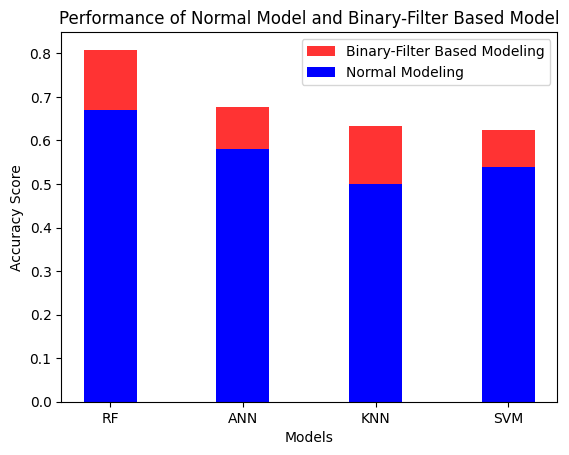

In [ ]:
label = ['RF', 'ANN', 'KNN', 'SVM']  # model label
plt.figure()
plt.bar(label, height = Accuracy_binary, alpha=0.8,
        label = 'Binary-Filter Based Modeling', color = 'red', width = 0.4)
plt.bar(label, height = Accuracy_d, label = 'Normal Modeling', color = 'blue',
        width = 0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Performance of Normal Model and Binary-Filter Based Model')
plt.legend()
plt.savefig('Fig4')